### Loading the Libraries

In [1]:
!pip install yellowbrick

import warnings
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.utils

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the Data

In [2]:
input_data = pd.read_csv(r"C:\Users\user\Downloads\data (1)\data\clustering\Wholesale customers data.csv", sep=",")
print(input_data.shape)
input_data.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
input_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
print(input_data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


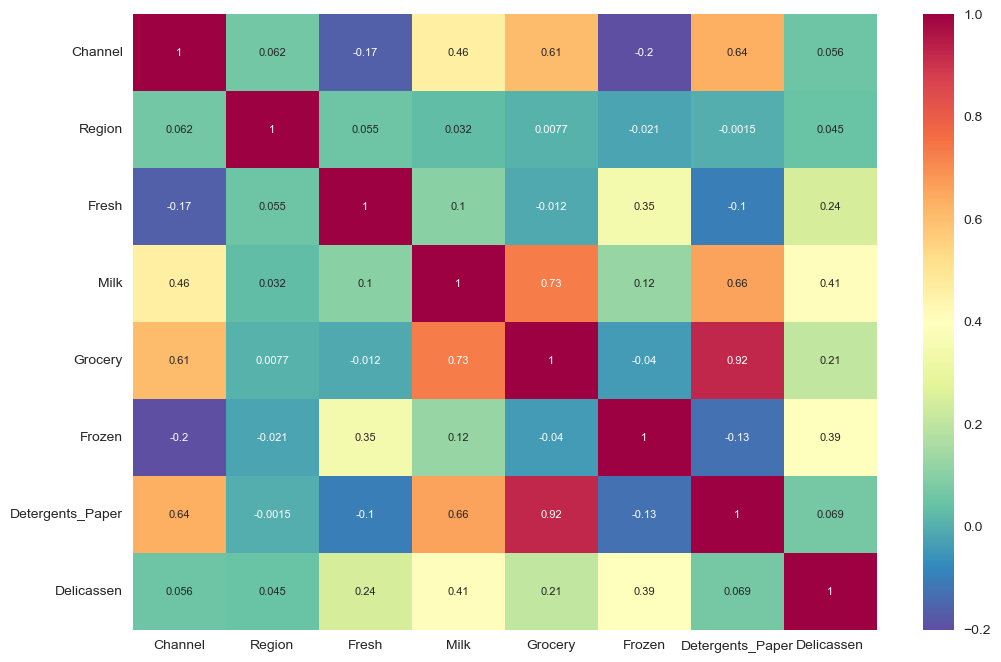

In [6]:
corr_matrix = input_data.corr()

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");

### Data pre-processing

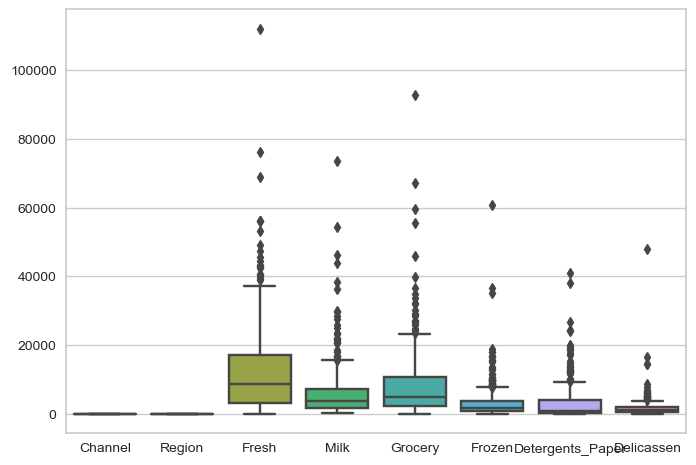

In [10]:
ax = sns.boxplot(data=input_data)
plt.show();

In [11]:
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(input_data)

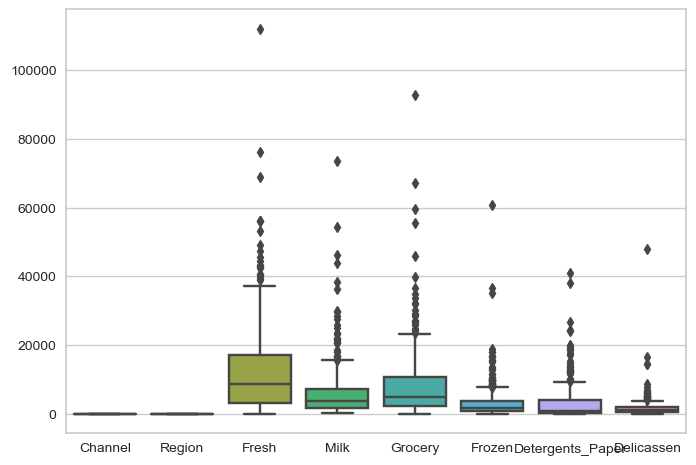

In [12]:
ax = sns.boxplot(data=input_data)
plt.show();

# K - means

In [13]:
km = KMeans(n_clusters = 2)
km.fit(X_scaled) 

cluster_assignment = km.labels_
cluster_assignment

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [14]:
input_data["KMCluster"] = cluster_assignment
input_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,0
9,2,3,6006,11093,18881,1159,7425,2098,1


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


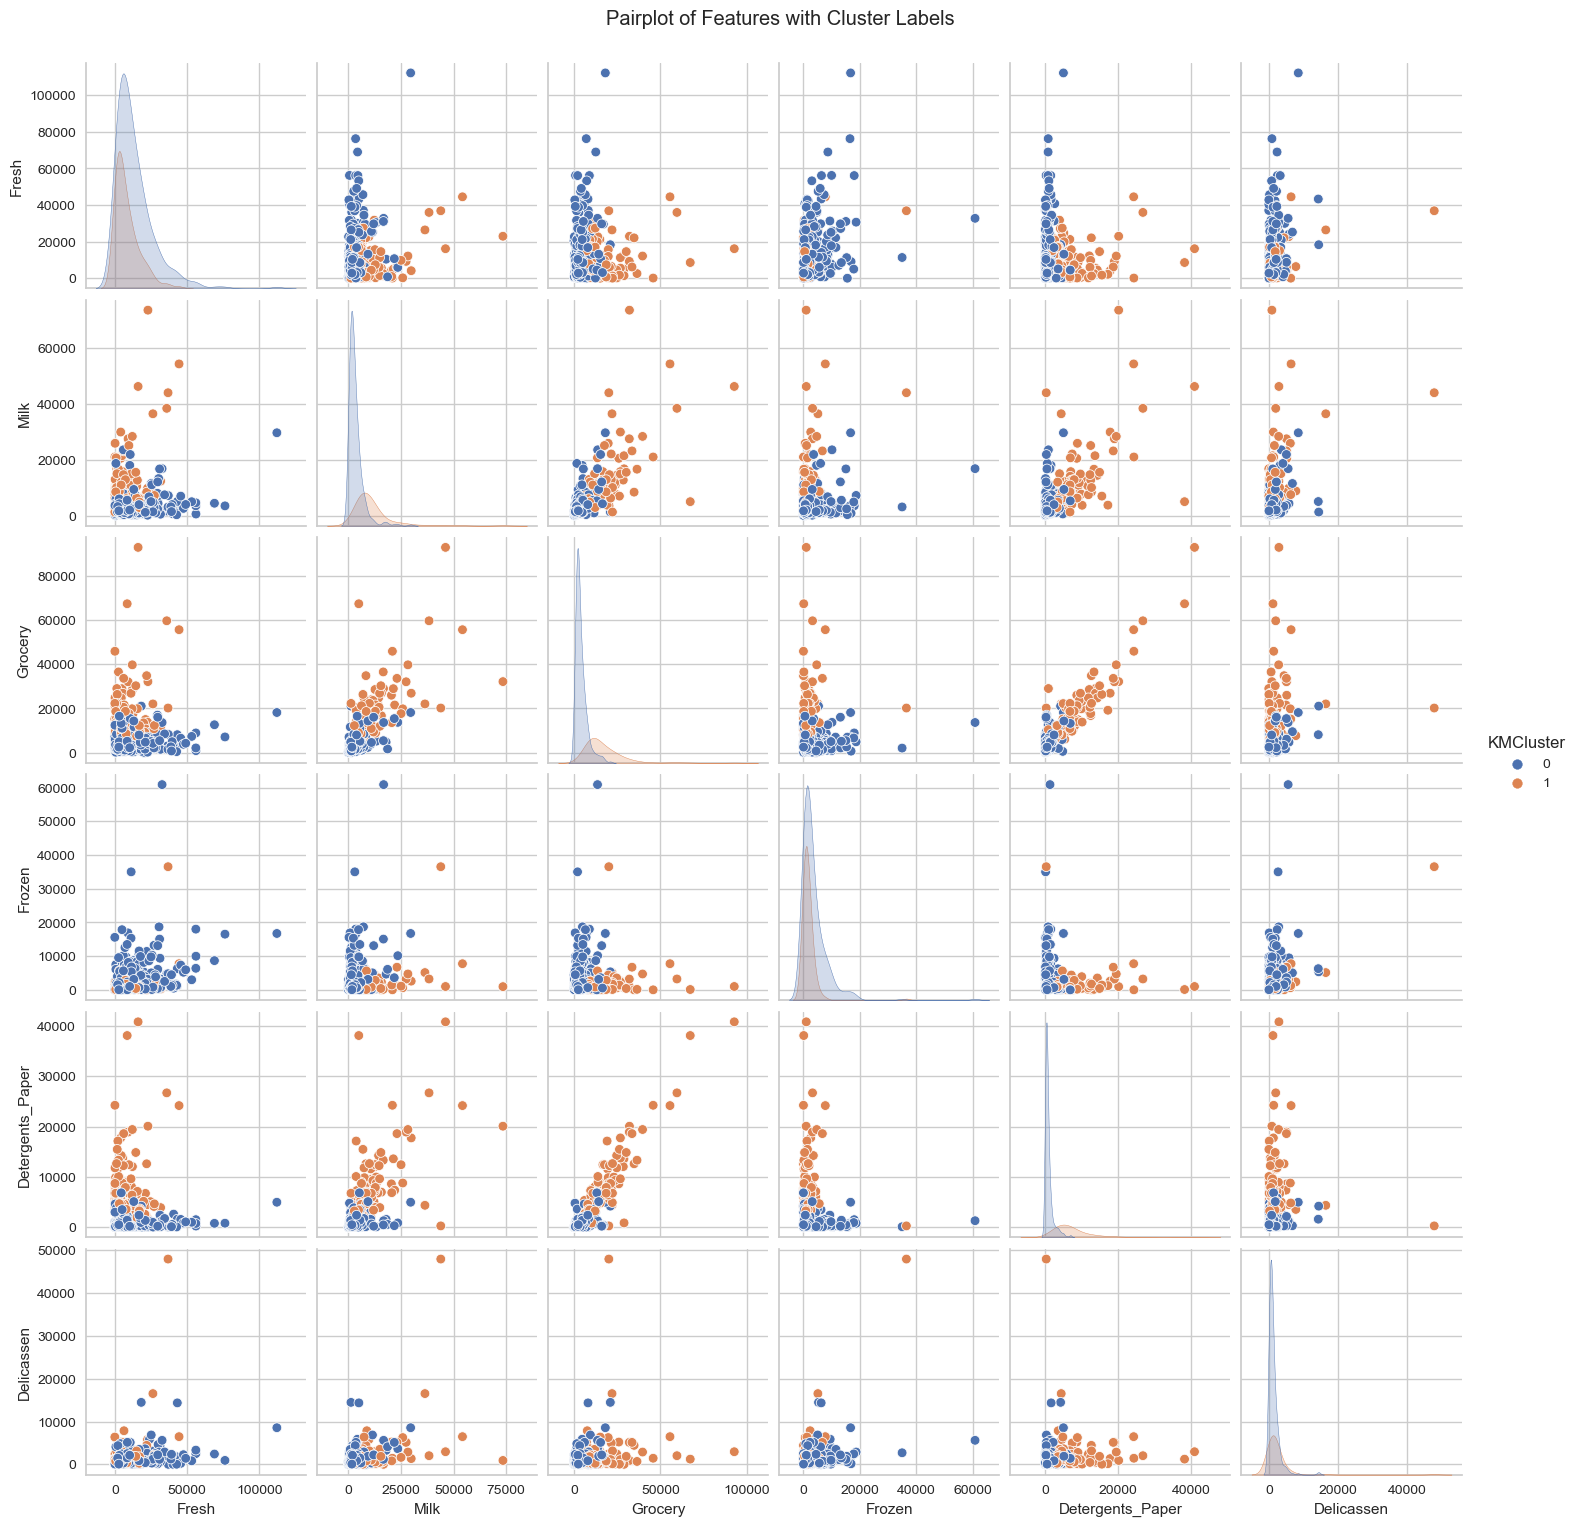

In [15]:
feature_list = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

sns.pairplot(input_data, vars=feature_list, hue='KMCluster', palette='deep')
plt.suptitle('Pairplot of Features with Cluster Labels', y=1.02)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

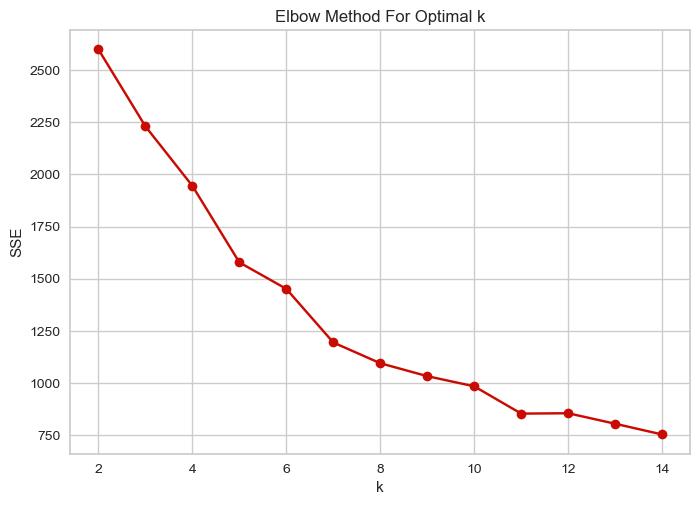

In [16]:
Sum_of_squared_distances = [] 

K = range(2, 15)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(X_scaled)
    
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

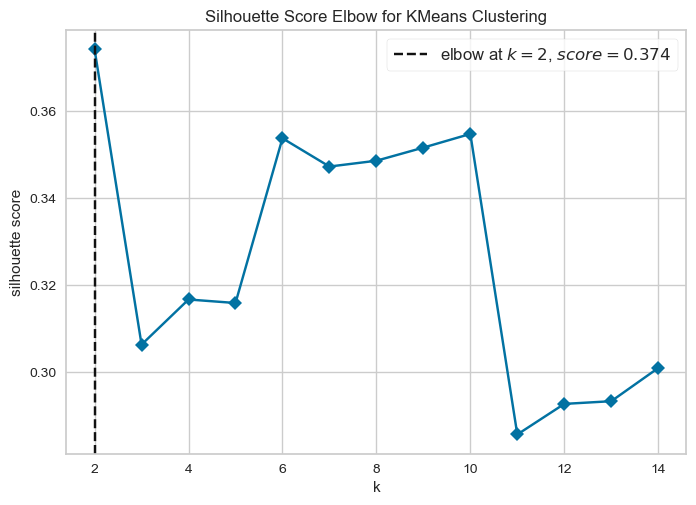

In [17]:
model = KMeans(random_state=123) 

visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette', timings=False)
visualizer.fit(X_scaled)    
visualizer.poof()
plt.show();

In [18]:
opt_k = 2
kmodel = KMeans(n_clusters=opt_k)
kmodel.fit(X_scaled)
cluster_assignment = kmodel.labels_
cluster_assignment

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
input_data["KMCluster"] = cluster_assignment
input_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,1


In [20]:
kmodel.cluster_centers_

array([[-0.05206239, -1.50525144, -0.10755472, -0.06250666,  0.01474244,
         0.06691965,  0.0341074 , -0.08660556],
       [ 0.02042954,  0.59066829,  0.04220502,  0.02452793, -0.00578501,
        -0.02625961, -0.01338392,  0.03398446]])

# PCA

In [21]:
pca = PCA(0.90)
pc_scores = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.38750123, 0.61124711, 0.73771884, 0.83001788, 0.89959693,
       0.95701047])

In [22]:
PCs = ['PC'+str(i+1) for i in range(pc_scores.shape[1])]

In [23]:
pc_scores = pd.DataFrame(pc_scores, columns=PCs)
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372


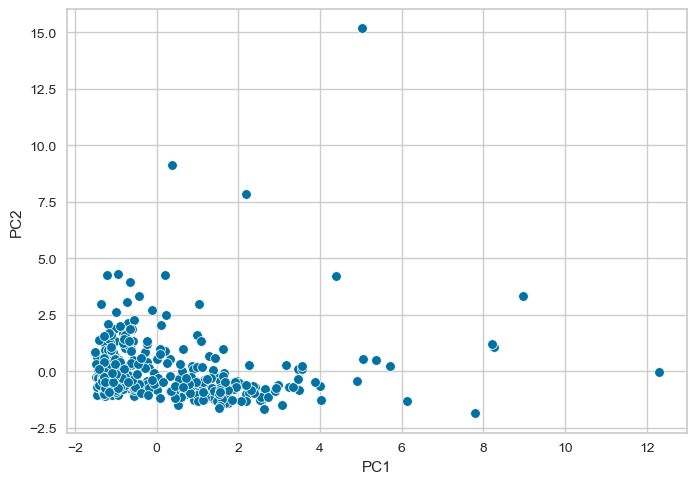

In [24]:
sns.scatterplot(x="PC1", y="PC2", data=pc_scores)
plt.show();

# Elbow test

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

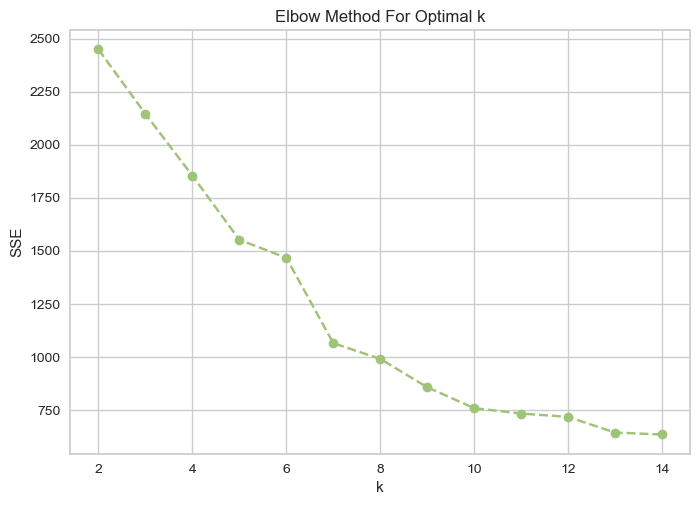

In [26]:
Sum_of_squared_distances = [] 
 
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(pc_scores)
    
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'go--')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

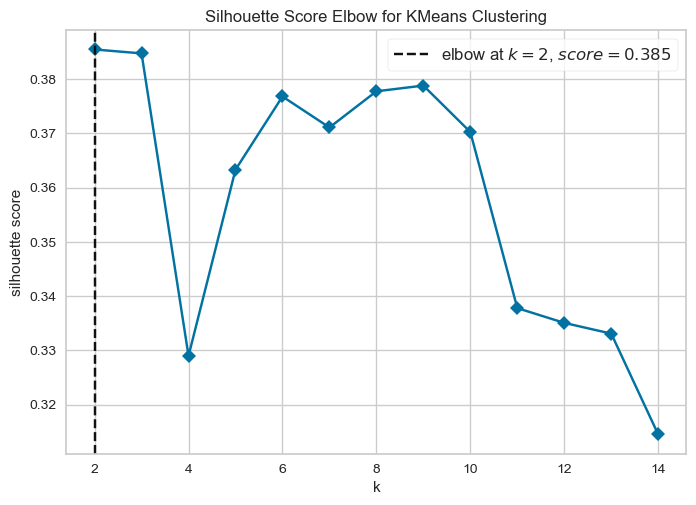

In [27]:
model = KMeans(random_state=123) 

visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette', timings=False)
visualizer.fit(pc_scores)    
visualizer.poof()
plt.show();

In [28]:
kmodel = KMeans(n_clusters=3)
kmodel.fit(pc_scores)
cluster_assignment = kmodel.labels_
pc_scores["KMCluster PCA"] = cluster_assignment
pc_scores.head()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,KMCluster PCA
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441,2
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227,2
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442,2
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959,1
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372,2


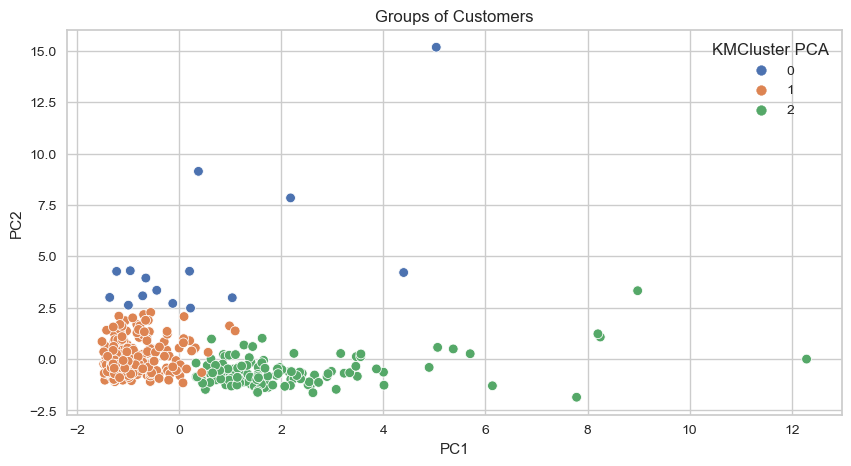

In [29]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=pc_scores, 
                hue= "KMCluster PCA",
                palette="deep"
               ).set_title('Groups of Customers')

plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


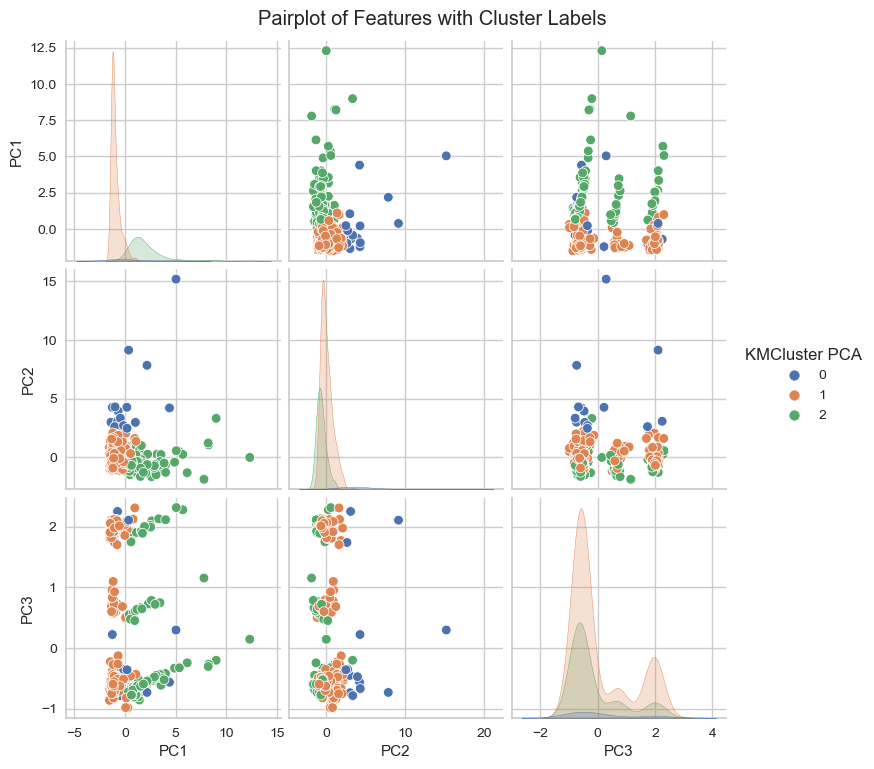

In [30]:
feature_list_PCA = ['PC1', 'PC2', 'PC3']

# Create a pairplot with hue as cluster labels
sns.pairplot(pc_scores, vars=feature_list_PCA, hue='KMCluster PCA', palette='deep')
plt.suptitle('Pairplot of Features with Cluster Labels', y=1.02)
plt.show()

# Hierarchical Clustering

### Plot a dendrogram

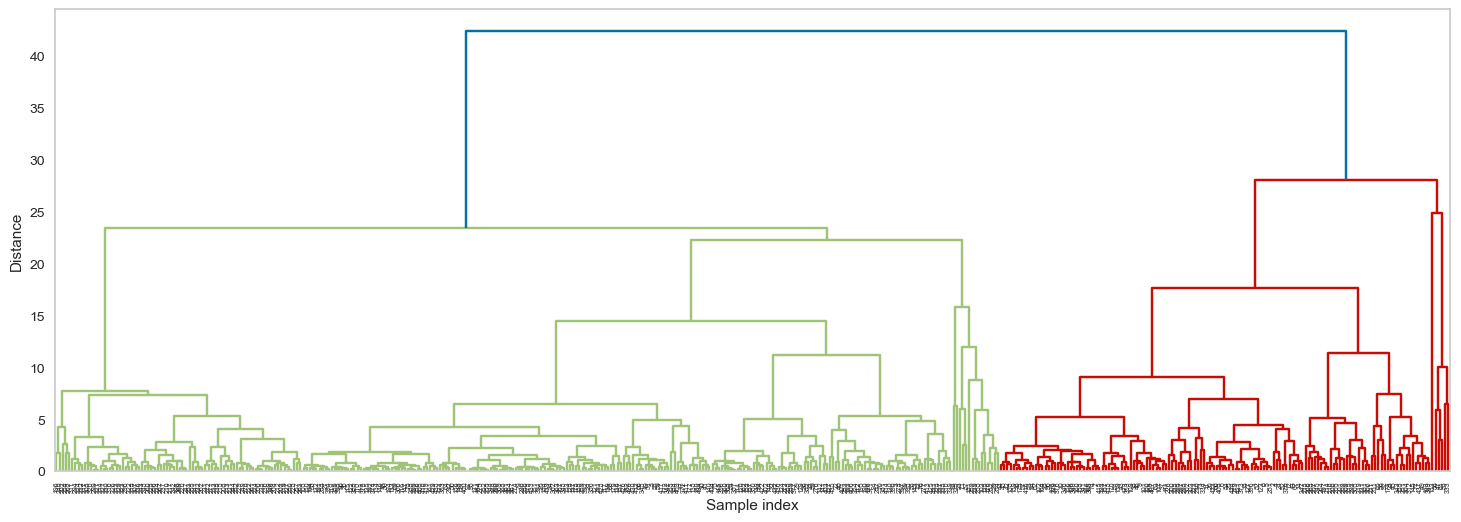

In [31]:
Z = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()

### Agglomerative Hierarchical Clustering using sklearn

In [32]:
agglomerative = AgglomerativeClustering(n_clusters = 5, 
                                        linkage    = 'ward', 
                                        metric     = 'euclidean')

agglomerative.fit(X_scaled)
cluster_assignment = agglomerative.labels_
cluster_assignment

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4,
       2, 4, 2, 4, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 2, 4, 2,

In [33]:
input_data["HCACluster"] = cluster_assignment
input_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster,HCACluster
0,2,3,12669,9656,7561,214,2674,1338,1,2
1,2,3,7057,9810,9568,1762,3293,1776,1,2
2,2,3,6353,8808,7684,2405,3516,7844,1,2
3,1,3,13265,1196,4221,6404,507,1788,1,0
4,2,3,22615,5410,7198,3915,1777,5185,1,2
5,2,3,9413,8259,5126,666,1795,1451,1,2
6,2,3,12126,3199,6975,480,3140,545,1,2
7,2,3,7579,4956,9426,1669,3321,2566,1,2
8,1,3,5963,3648,6192,425,1716,750,1,0
9,2,3,6006,11093,18881,1159,7425,2098,1,2


In [34]:
# Visualize the clusters using a scatterplot

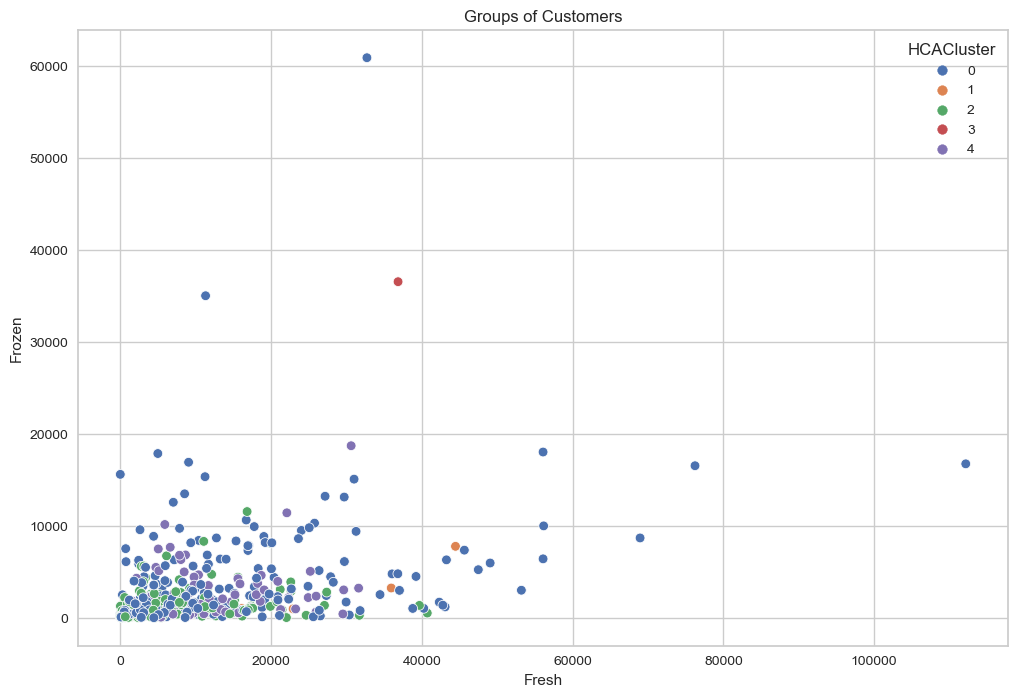

In [35]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Frozen', 
                data=input_data, 
                hue= "HCACluster",
                palette="deep"
               ).set_title('Groups of Customers')
plt.show()

# DBSCAN

In [36]:
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(X_scaled)
cluster_assignment = db.labels_
cluster_assignment

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,
        0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
       -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [37]:
print ('Number of clusters found', len(np.unique(cluster_assignment)))
print ('Clusters found', np.unique(cluster_assignment))

Number of clusters found 2
Clusters found [-1  0]


In [38]:
input_data['DBCluster'] = cluster_assignment
input_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster,HCACluster,DBCluster
0,2,3,12669,9656,7561,214,2674,1338,1,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,2,-1
3,1,3,13265,1196,4221,6404,507,1788,1,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,1,2,-1
5,2,3,9413,8259,5126,666,1795,1451,1,2,-1
6,2,3,12126,3199,6975,480,3140,545,1,2,-1
7,2,3,7579,4956,9426,1669,3321,2566,1,2,-1
8,1,3,5963,3648,6192,425,1716,750,1,0,-1
9,2,3,6006,11093,18881,1159,7425,2098,1,2,-1


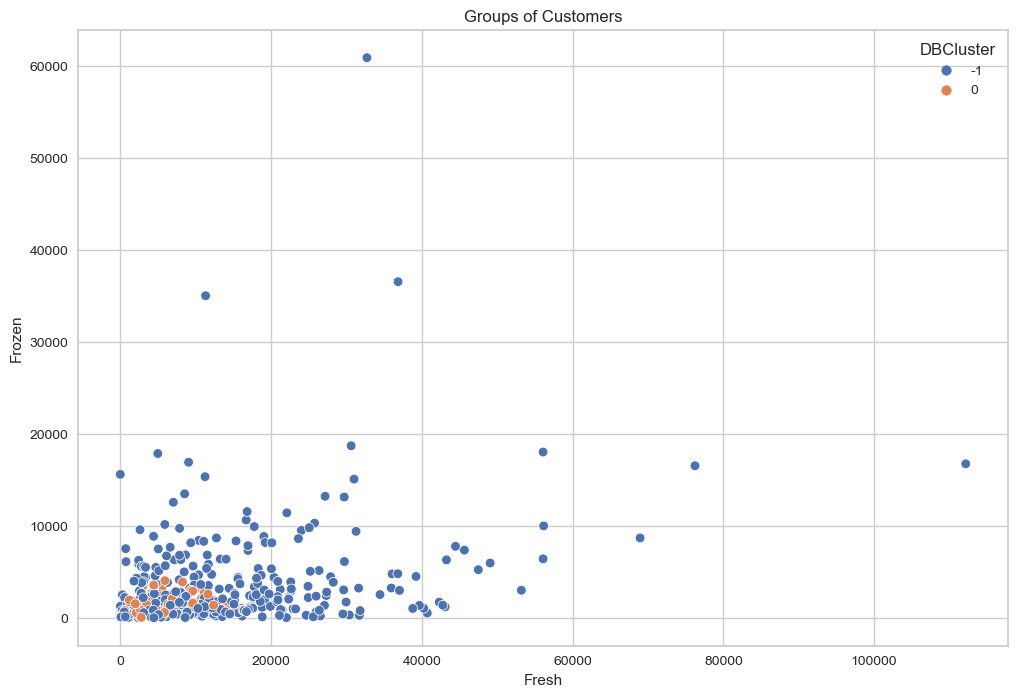

In [39]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Frozen', 
                data=input_data, 
                hue= "DBCluster",
                palette="deep"
               ).set_title('Groups of Customers')
plt.show()

In [40]:
eps  = np.linspace(.3, 2.0, 20)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_found = len(np.unique(db.fit_predict(X_scaled)))
        Z[i,j] = clusters_found

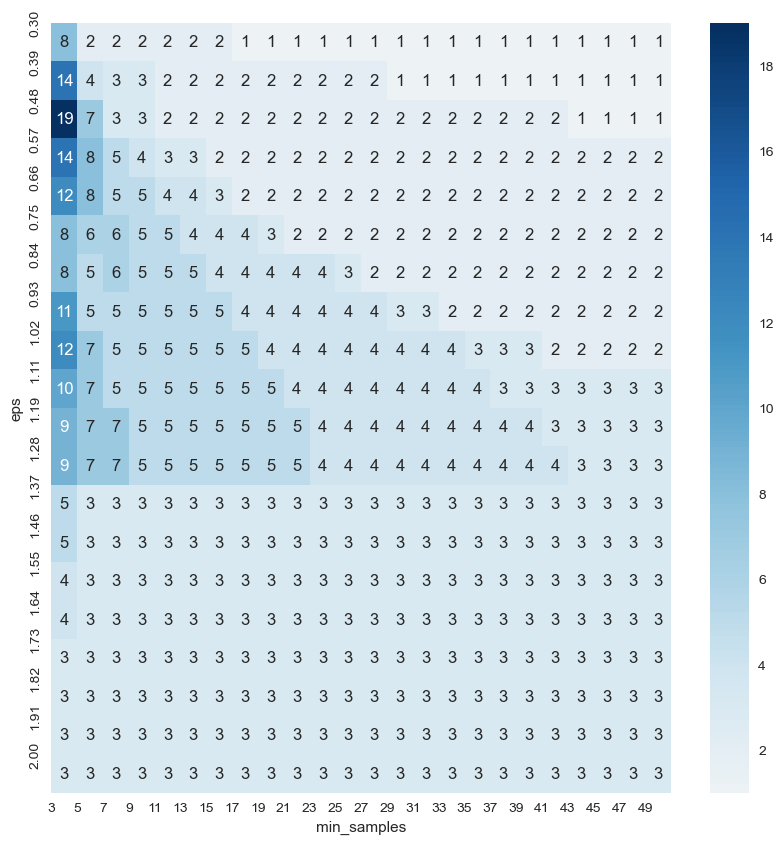

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()